In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df=pd.read_csv("dataset/height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

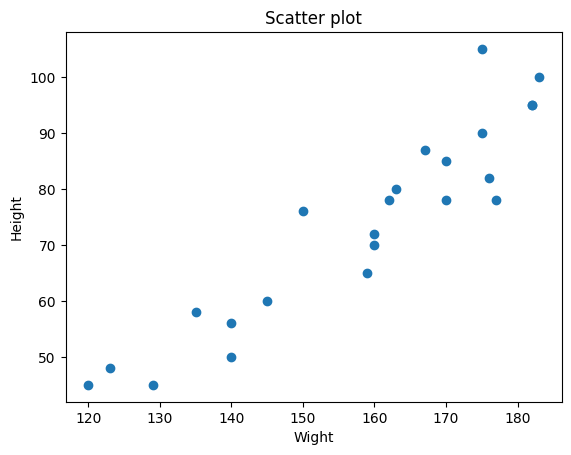

In [4]:
plt.scatter(df["Height"],df["Weight"])
plt.title("Scatter plot")
plt.xlabel("Wight")
plt.ylabel("Height")

In [5]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


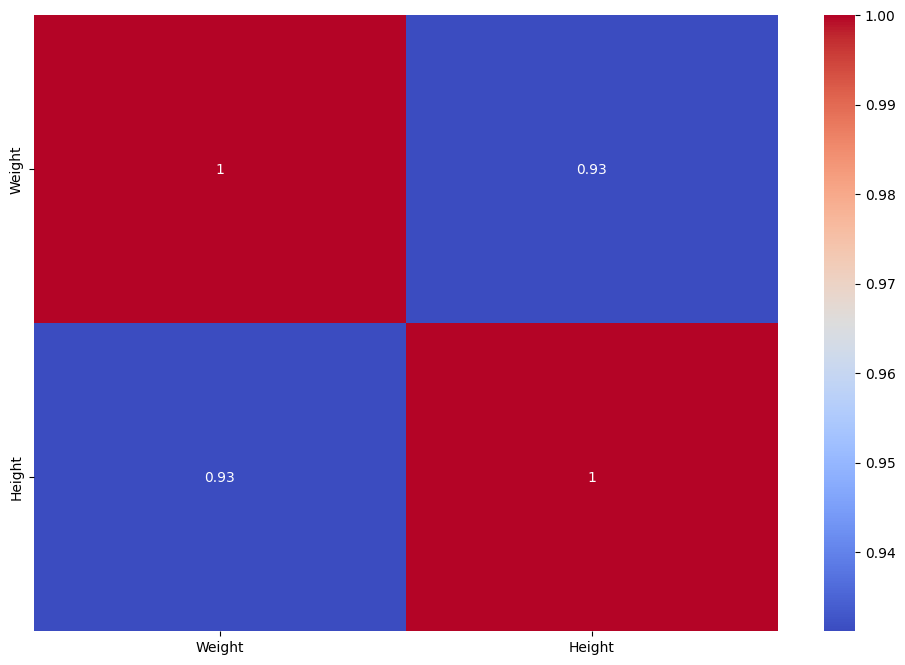

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)
plt.show()

In [31]:
X=df[["Weight"]]
y=df['Height']

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [38]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [39]:
print(X_train)

[[ 1.73689094]
 [-0.92026952]
 [ 1.4542143 ]
 [ 0.21043706]
 [-1.48562281]
 [ 1.17153765]
 [-1.6552288 ]
 [-0.80719886]
 [-0.24184557]
 [ 0.0973664 ]
 [-1.37255215]
 [-1.03334018]
 [-0.12877492]
 [ 0.88886101]
 [ 0.43657837]
 [ 0.60618436]
 [ 0.71925502]
 [ 0.32350772]]


In [40]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [42]:
linear.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


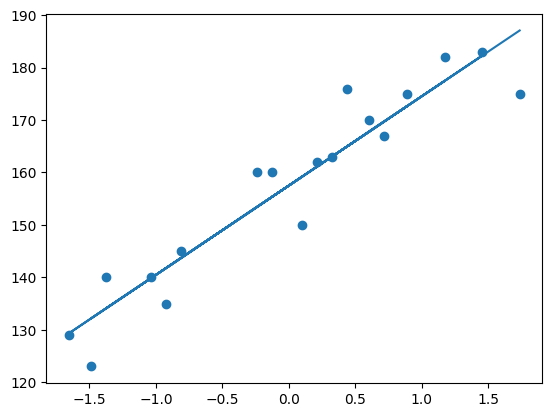

In [48]:
plt.scatter(X_train,y_train)
plt.plot(X_train,linear.predict(X_train))

In [50]:
y_pred_test=linear.predict(X_test)
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

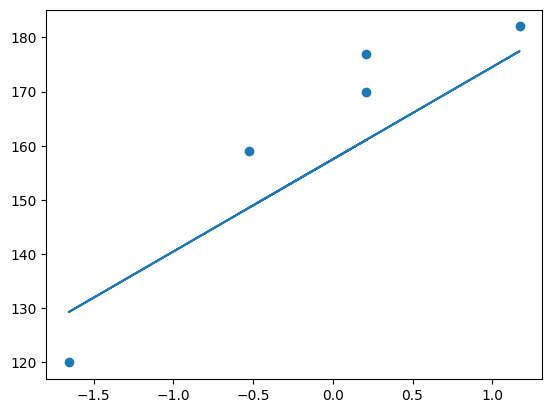

In [53]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test)

In [54]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [56]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(f"MSE:{mse}")
print(f"MAE:{mae}")
print(f"RMSE:{rmse}")


MSE:109.77592599051664
MAE:9.822657814519232
RMSE:10.477400726827081
